# Fundamentals of Data Analysis

## Student: Hans Pérez Rubín de Celis

## Student ID number: G00387884


## Instructions
In this project you must perform and explain simple linear regression using Python on the ``powerproduction`` dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, the following items:

**1. Jupyter notebook that performs simple linear regression on the data set.**

**2. In that notebook, an explanation of your regression and an analysis of its accuracy.**

**3. Standard items in a git repository such as a README.**

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.

## Introduction

Linear regression is a statistical method that tries to model the relationship between a continuous variable and one or more independent variables by fitting a linear equation. It is called simple linear regression when there is only one independent variable and multiple linear regression when there is more than one. Depending on the context, the modeled variable is known as a dependent variable or response variable, and the independent variables as regressors, predictors or features.

![imagen regression](https://miro.medium.com/max/560/1*N2usf10aKCq1JBIqxj-YFQ.png)

As you can see, a linear relationship can be positive (the independent variable goes up, the dependent variable goes up) or negative (the independent variable goes up, the dependent variable goes down).


## I. Linear regression.
Linear regression is a supervised learning algorithm used in machine learning and statistics.

For more information you can enter wikipedia [here](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal)

![imagen](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg)

Let's quickly recall the formula for the line:

``Y = mX + b``

Where ``Y`` is the result, ``X`` is the variable, ``m`` the slope (or coefficient) of the line and ``b`` the constant or also known as the "cut-off point with the ``Y`` axis" in the graph (when ``X = 0``)

Here we see an example where we see data collected on the prices of pizzas in Denmark (the points in red) and the black line is the trend. That is the regression line that we want the algorithm to learn and calculate only.
![imagen pizza](https://i1.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/05/pizza_en_dinamarca.png)

## II. Linear regression algorithm.

Let us remember that Supervised Machine Learning algorithms learn by themselves and -in this case- to automatically obtain that "line" that we are looking for with the prediction trend. To do this, the error is measured with respect to the input points and the actual output “Y” value. The algorithm should minimize the cost of a quadratic error function and those coefficients will correspond to the optimal line. There are several methods to minimize the cost. The most common is to use a vector version and the so-called Normal Equation that will give us a direct result.

In [7]:
# Data:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [10]:
n = len(x)
x = np.array(x)
y = np.array(y)
sumx = sum(x)
sumy = sum(y)
sumx2 = sum(x*x)
sumy2 = sum(y*y)
sumxy = sum(x*y)
promx = sumx/n
promy = sumy/n

In [13]:
m = (sumx*sumy - n*sumxy)/(sumx**2 - n*sumx2)
b = promy - m*promx
m , b

(1.0, 0.0)

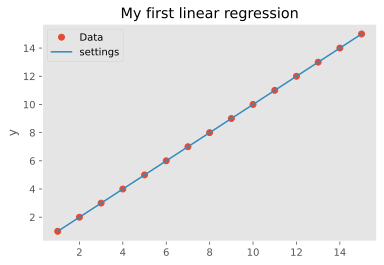

In [23]:
plt.plot(x,y,'o', label='Data')
plt.plot(x, m*x + b, label='settings')
plt.ylabel('x')
plt.ylabel('y')
plt.title('My first linear regression')
plt.grid()
plt.legend()
plt.show()

## III. Developing the linear regression of POWERPRODUCTION.CSV
Let's start by importing the libraries that we will use:

In [16]:
# Required Imports
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

We read the csv file and load it as a Pandas dataset. And we see its size

In [17]:
# we load the input data
data = pd.read_csv("powerproduction.csv")
# let's see how many dimensions and records it contains
data.shape

(500, 2)

In [35]:
powerproduction.describe

<bound method NDFrame.describe of       speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]>

Let's look at those first rows:

In [9]:
## is 500 records with 2 columns. Let's see the first records
data.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


Let's look at some basic statistics of our input data:

In [20]:
# Now let's see some statistics of our data
data.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


Now we are going to generate related variables

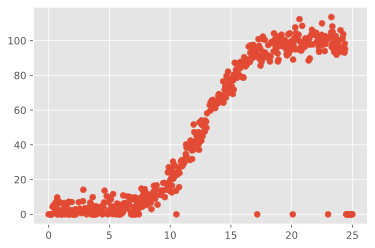

In [24]:
from matplotlib import pyplot as plt
import pandas as pd
powerproduction = pd.read_csv('powerproduction.csv')
data1 = powerproduction['speed'].tolist()
data2 = powerproduction['power'].tolist()
plt.scatter(data1, data2)
plt.show()

## IV. Development of our simple linear regression

Linear Regression is a parametric technique used to predict continuous, dependent variables, given a set of independent variables.

The goal with Simple Linear Regression is to minimize the vertical distance between all the data and our line, therefore, to determine the best line, we must minimize the distance between all the points and the distance from our line. There are many methods to accomplish this goal, but all of these methods have only one goal, which is to minimize distance.

One way that the regression model finds the best line of fit is by using the least squares criterion to reduce the error.

Error is an inevitable part of the prediction process, no matter how powerful the algorithm we choose is, there will always be irreducible error. We know that we cannot completely eliminate the error, but we can still try to reduce it to the lowest level. It is precisely at this time that the technique known as least squares is used.

The least squares technique tries to reduce the sum of errors squared, looking for the best possible value of the regression coefficients.

Least squares is not the only technique to use in Linear Regression but it is selected because:

It uses a square error that has good mathematical properties, making it easier to differences and calculate the descent of the gradient.
It is easy to analyze and computationally faster, that is, it can work quickly on data sets that have miles of characteristics.
Interpretation is much easier than other regression techniques.

Next we visualize the simple line of the data

265989.41437957867


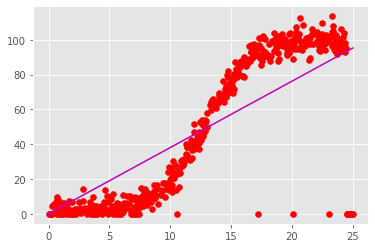

In [23]:
import csv

with open('powerproduction.csv', 'r', newline='') as file:
    has_header = csv.Sniffer().has_header(file.read(1024))
    file.seek(0)  # Rewind.
    reader = csv.reader(file)
    if has_header:
        next(reader)
    your_list = list(reader)

independentVars = []
dependentVars = []

for i in range(len(your_list)):
    independentVars.append(float(your_list[i][0]))
    dependentVars.append(float(your_list[i][1]))
    
simpleLinearRegression(independentVars, dependentVars)

The next section shows us the energy generated.

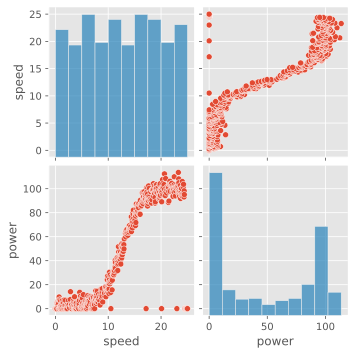

In [46]:
import seaborn as sns
import pandas as pd

powerproduction = pd.read_csv('powerproduction.csv')
sns.pairplot(powerproduction)

## V. Linear Regression with Python and SKLearn
We are going to create our input data for the moment only ``speed`` and as labels the ``power``. We create the LinearRegression object and make it "fit" (train) with the fit () method. Finally we print the coefficients and scores obtained.

In [47]:
# # We assign our input variable X for training and the labels Y.
dataX =filtered_data[["speed"]]
X_train = np.array(dataX)
y_train = filtered_data['power'].values
 
# We create the Linear Regression object
regr = linear_model.LinearRegression()
 
# We train our model
regr.fit(X_train, y_train)
 
# We make the predictions that ultimately a line (in this case, being 2D)
y_pred = regr.predict(X_train)
 
# Let's see the coefficients obtained, In our case, they will be the Tangent
print('Coefficients: \n', regr.coef_)

print('Independent term: \n', regr.intercept_)

print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.9702016]
Independent term: 
 0.44839587792491553
Mean squared error: 14.77
Variance score: 0.34


## VI. Prediction in simple linear regression
Let's try to test our algorithm, assuming we wanted to predict how many "shares" a 2000 word ML article will get.

In [48]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

1940


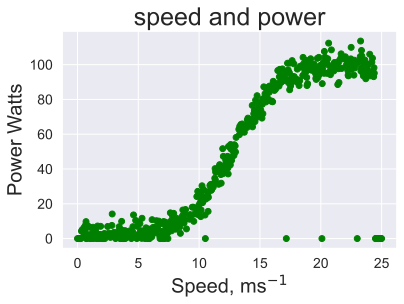

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

lin_data = pd.read_csv('powerproduction.csv')

X = lin_data.iloc[:, 0].values
y = lin_data.iloc[:, 1].values

def scatter_plot(X, y, col, mark, lab):
    plt.scatter(X, y, color=col, marker=mark, label=lab);

    # Title of plot
    plt.title("speed and power", fontsize=25)
    
    # the x label of plot
    plt.xlabel("Speed, ms$^{-1}$", fontsize=20)
    
    # the y label of plot
    plt.ylabel("Power Watts", fontsize=20)
    
    # change size of ticks of x and y axes
    ax = plt.gca()
    ax.tick_params(axis = 'both',which = 'major', labelsize = 14)
    
scatter_plot(X, y, "green", 'o', 'power')

In [56]:
lin_data.loc[(lin_data['power'] == 0 ) & (lin_data['speed'] > 10)]

,speed,power
208,10.511,0.0
340,17.167,0.0
404,20.095,0.0
456,22.998,0.0
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0


In [57]:
lin_data = lin_data.drop([208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]);
lin_data.loc[(lin_data['power'] == 0 ) & (lin_data['speed'] > 10)].size

0

In [63]:
X = lin_data.iloc[:, 0].values
y = lin_data.iloc[:, 1].values

X = X.reshape(-1, 1)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

-20.13186984928337
[5.63261221]


In [60]:
from sklearn import metrics
import numpy as np
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean of observed y values:', np.mean(y))
print('Coefficient of variation:', (100*np.sqrt(metrics.mean_squared_error(y_test, y_pred)))/np.mean(y))

Mean Absolute Error: 11.293006536456128
Mean Squared Error: 169.0910962735623
Root Mean Squared Error: 13.00350323080524
Mean of observed y values: 49.397720164609055
Coefficient of variation: 26.32409590457494


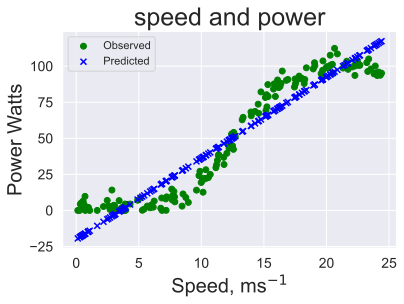

In [64]:
scatter_plot(X_test, y_test, "green", "o", "Observed")
scatter_plot(X_test, y_pred, "blue", "x", "Predicted")
plt.legend()
plt.show()

## Bibliographic references

#### [Python Machine Learning - Second Edition](http://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=nlebk&AN=1606531&site=eds-live&scope=site&custid=s2873033&ebv=EB&ppid=pp_9)
Author:Raschka, Sebastian, Mirjalili, Vahid

![book1](https://user-images.githubusercontent.com/60121637/82153453-66aab500-985f-11ea-881a-fd5e2bbd3c8e.png)

#### [Mastering Social Media Mining with Python](http://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=e000xww&AN=1295360&site=eds-live&scope=site&custid=s2873033&ebv=EB&ppid=pp_32)
Author: Bonzanini, Marco

![book2](https://user-images.githubusercontent.com/60121637/82153488-a40f4280-985f-11ea-9b14-a7f0f4cf5d67.png)
#### [Python Data Science Essentials - Second Edition](http://search.ebscohost.com/login.aspx?direct=true&AuthType=ip,sso&db=e000xww&AN=1409191&site=eds-live&scope=site&custid=s2873033&ebv=EB&ppid=pp_Cover)
Author: Boschetti, Alberto, Massaron, Luca

![book3](https://user-images.githubusercontent.com/60121637/82153641-a756fe00-9860-11ea-8245-e15e478f1450.png)

## Other references

[Simple and Multiple Linear Regression in Python](https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9)

[Regresión Lineal en español con Python](https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/)

[Regresión lineal en Python](https://machinelearningparatodos.com/regresion-lineal-en-python/)

[Regresión lineal con Python](https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html)

[Regresión Lineal Simple con Python](https://www.jacobsoft.com.mx/es_mx/regresion-lineal-simple-con-python/)